In [1]:
import numpy as np

In [3]:
np.random.gumbel([-1, -3])

array([-1.37003025, -3.83335804])

In [24]:
def softmax(x):
    log_den = np.logaddexp.reduce(x, -1)
    return np.exp(x - log_den)

In [212]:
def concrete_sample(loc, temp=1.):
    return softmax((loc + np.random.gumbel(np.zeros_like(loc))) / temp)

In [213]:
concrete_sample(np.array([-1., -2., -3.]), temp=1.)

array([ 0.41576958,  0.50042404,  0.08380637])

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
def plot_concrete_samples(loc, temp=1., nb_samples=5):
    nb_types = len(loc)
    support = np.arange(1, nb_types + 1)
    cats = np.array([concrete_sample(loc, temp) for _ in range(nb_samples)])
    mean = cats.mean(0)
    plt.subplot(1, 2, 1, title='Concrete samples')
    for i, cat in enumerate(cats):
        plt.bar(support + (0.02 * i), cat, width=0.01, tick_label=support)
    plt.subplot(1, 2, 2, title='sample mean')
    #plt.title('Concrete(temp=%s): sample mean (N=%d)' % (temp, nb_samples))
    plt.bar(support, mean, width=0.02, tick_label=support, fill=False)

In [233]:
def binary_loc(p):
    """Convert a probability to a vector log([p, 1-p])"""
    assert 0 < p < 1, 'I need a number in the open (0,1)'
    return np.log(np.array([p, 1 - p]))

def nary_loc(p):
    """Convert a probability vector to log(p)"""
    assert len(p) > 1, 'I need 2 or more classes'
    assert np.all(np.array(p) > 0.) and np.all(np.array(p) < 1.), 'I need probability values'
    assert np.sum(p) == 1., 'I need a normalised vector'
    return np.log(p)

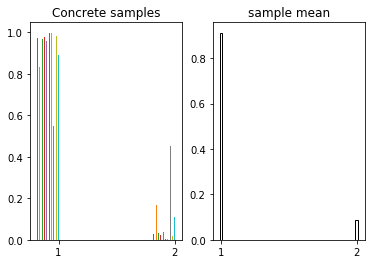

In [237]:
plot_concrete_samples(binary_loc(0.9), temp=1., nb_samples=10)

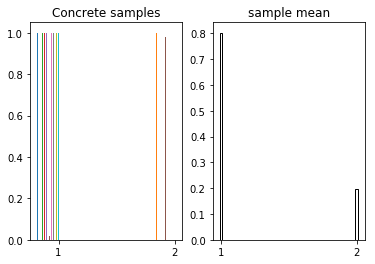

In [247]:
plot_concrete_samples(binary_loc(0.9), temp=0.1, nb_samples=10)

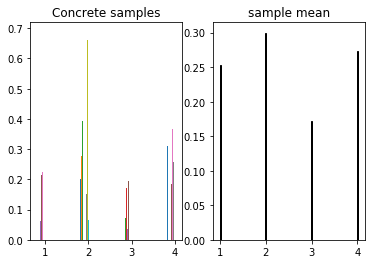

In [252]:
plot_concrete_samples(nary_loc([0.23, 0.27, 0.24, 0.26]), temp=1., nb_samples=10)

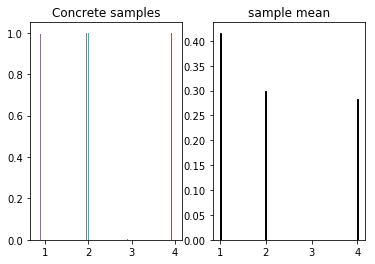

In [251]:
plot_concrete_samples(nary_loc([0.23, 0.27, 0.24, 0.26]), temp=0.1, nb_samples=10)

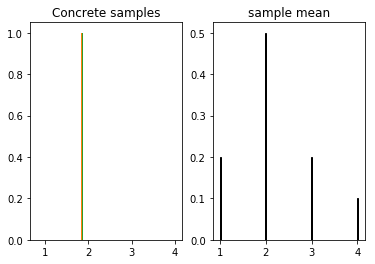

In [250]:
plot_concrete_samples(nary_loc([0.23, 0.27, 0.24, 0.26]), temp=0.01, nb_samples=10)